In [1]:
import sys
sys.path.append('../')

In [1]:
import numpy as np
import q2_module as q2m
import os

In [ ]:
folder_path = 'hw5_tifs'
file_names = os.listdir(folder_path)
tif_files = [f for f in file_names if f.endswith('.tif')]

n = 50
N = n**2

patterns_dict = {}
for tif_file in tif_files:
    patterns_dict[tif_file.rsplit('.', 1)[0]] = q2m.preprocess_image(folder_path + '/' + tif_file, n)

In [15]:
patterns_3 = np.array(list(patterns_dict.values())[:3]).reshape(3, N)
patterns_4 = np.array(list(patterns_dict.values())[:4]).reshape(4, N)

Storing 3 patterns.
Perturbing patterns with p = 0


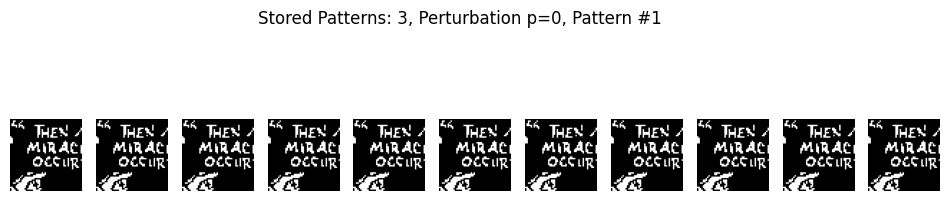

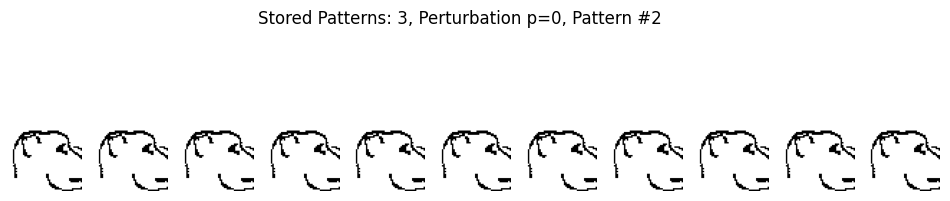

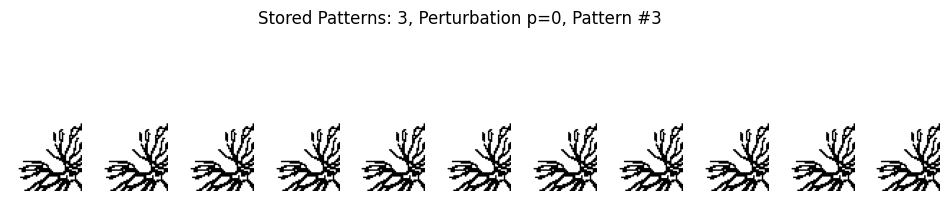

Perturbing patterns with p = 0.3


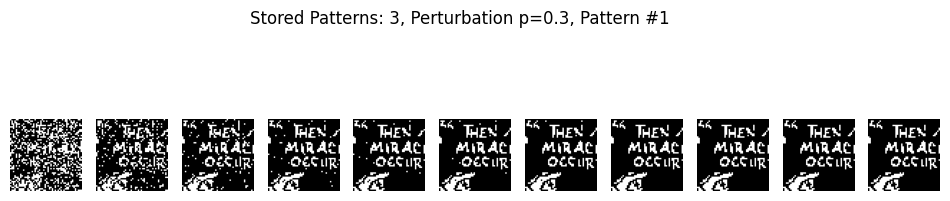

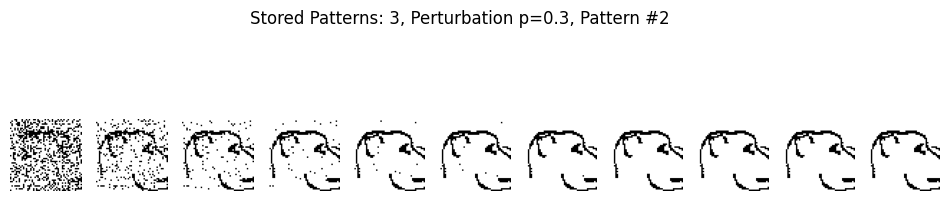

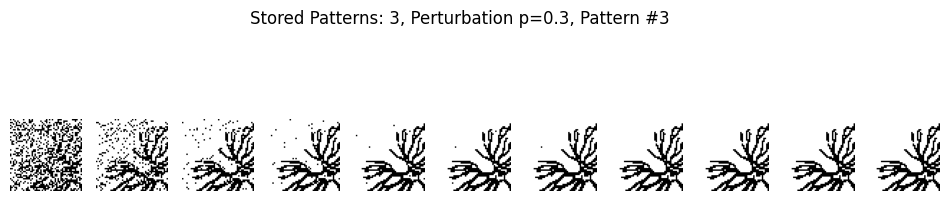

Perturbing patterns with p = 0.5


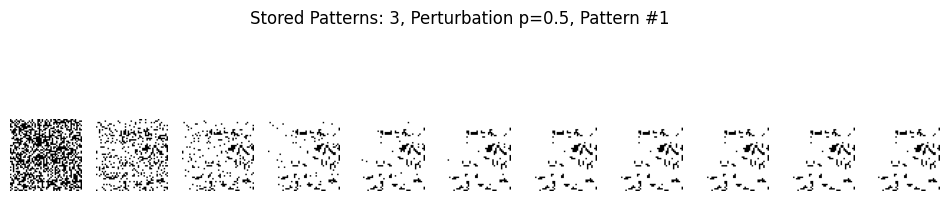

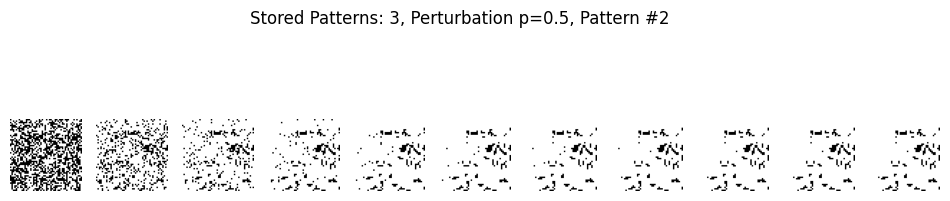

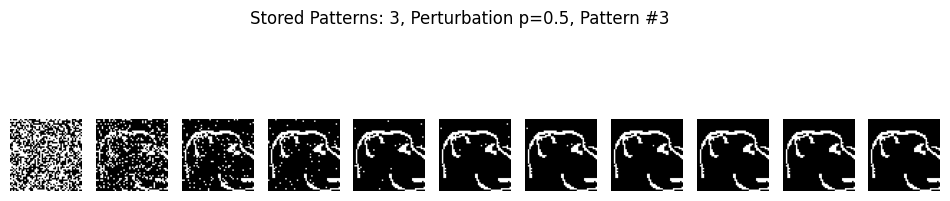

Perturbing patterns with p = 0.7


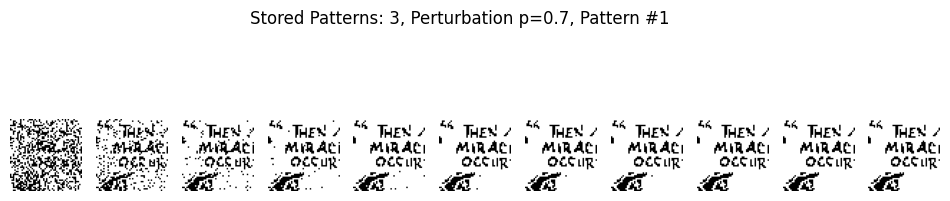

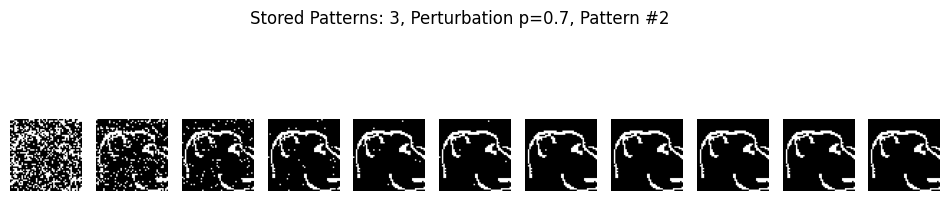

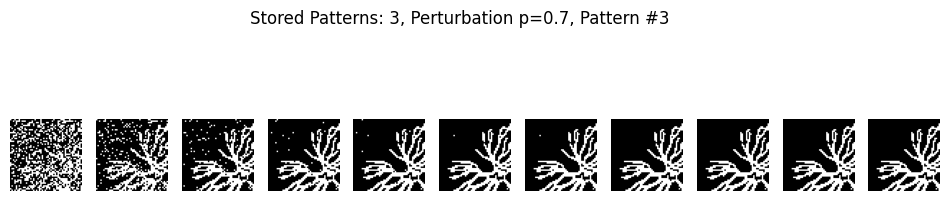

Storing 4 patterns.
Perturbing patterns with p = 0


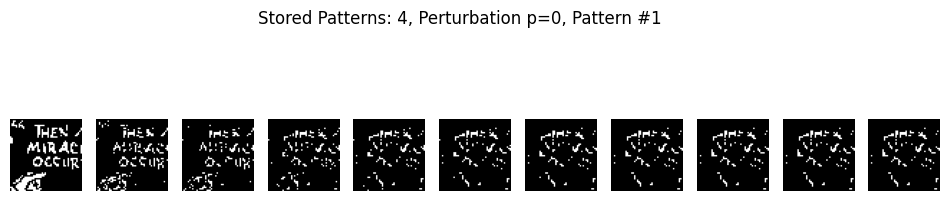

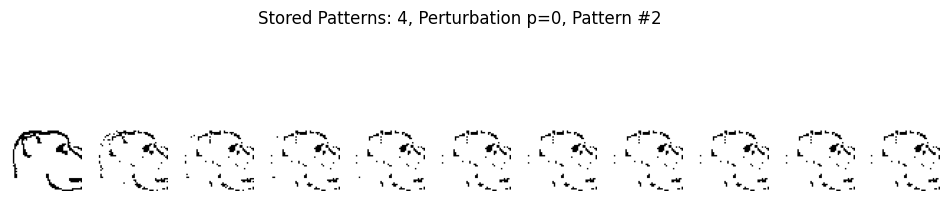

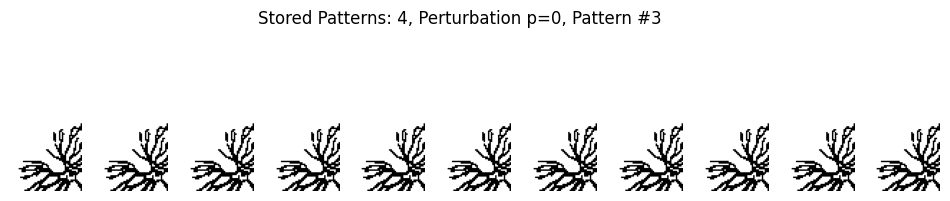

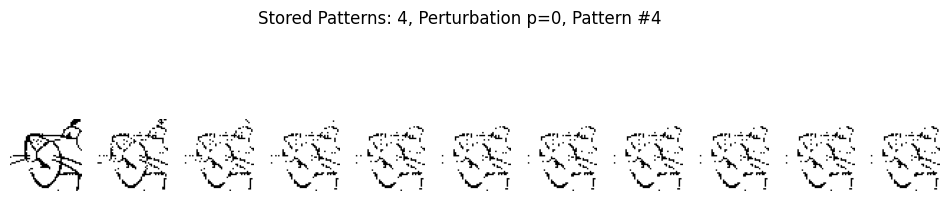

Perturbing patterns with p = 0.3


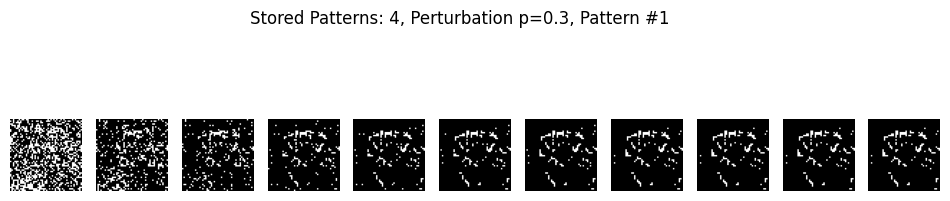

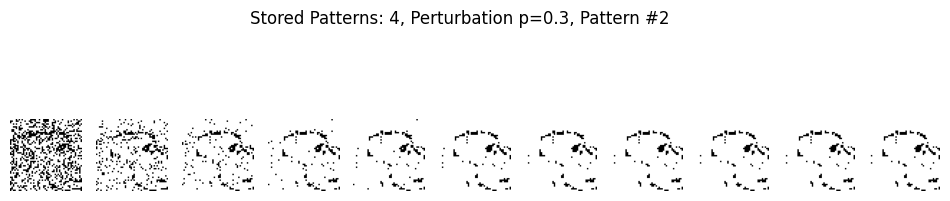

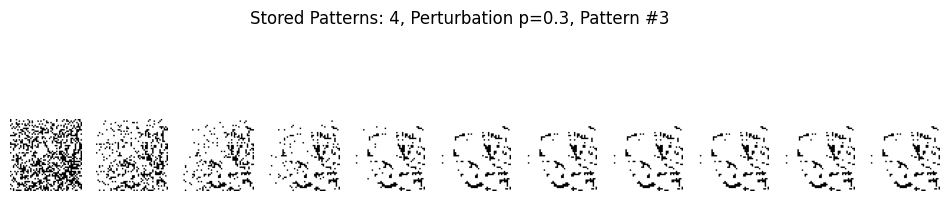

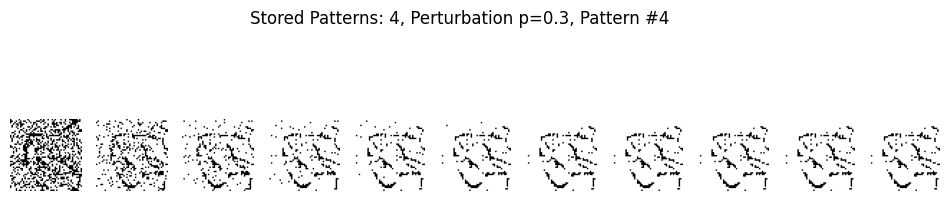

Perturbing patterns with p = 0.5


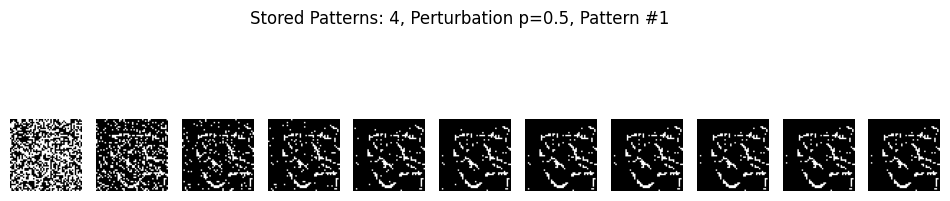

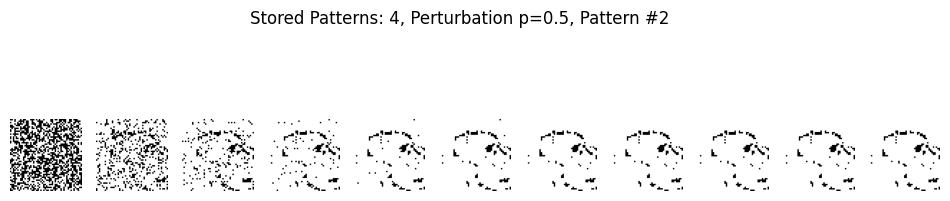

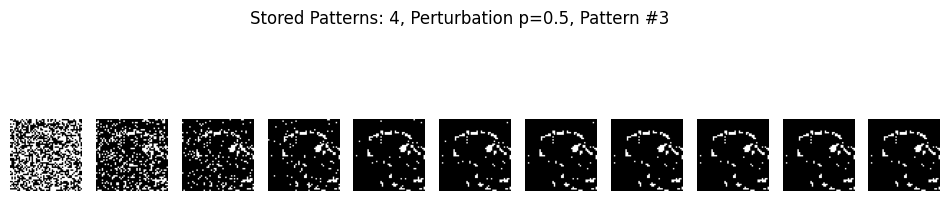

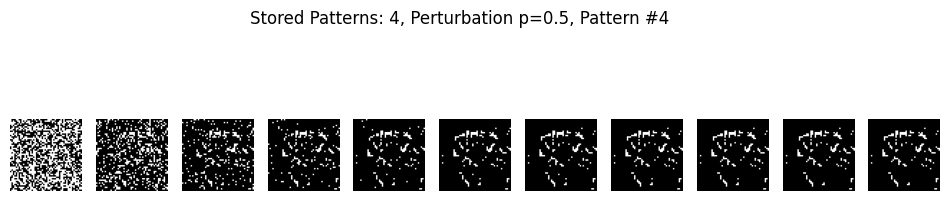

Perturbing patterns with p = 0.7


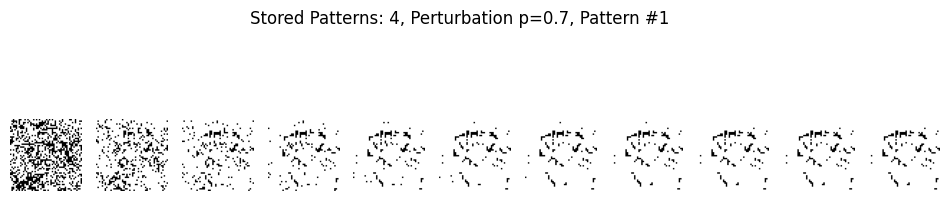

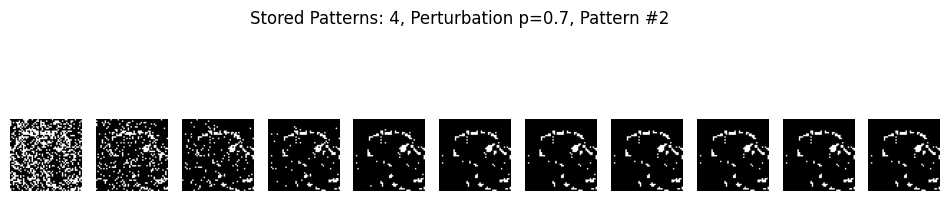

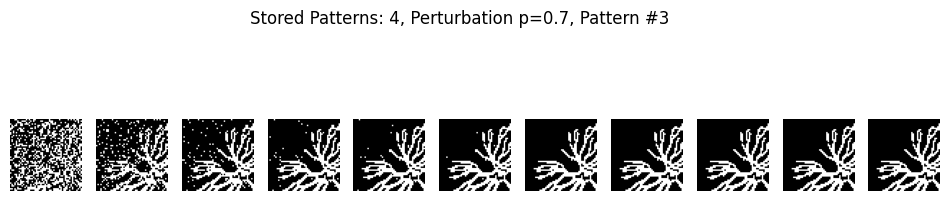

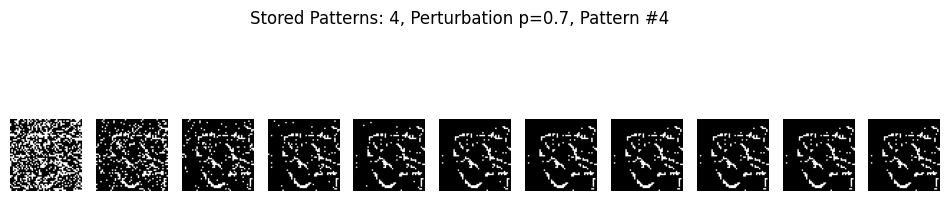

In [ ]:
p_values = [0, 0.3, 0.5, 0.7]

for stored_patterns, num_patterns in zip([patterns_3, patterns_4], [3, 4]):
    print(f"Storing {num_patterns} patterns")
    hopfield = q2m.HopfieldNetwork(stored_patterns)
    
    for p in p_values:
        print(f"Perturbing patterns with p = {p}")
        for pattern_idx, original_pattern in enumerate(stored_patterns):
            perturbed_pattern = q2m.perturb_pattern(original_pattern.flatten(), p)
            
            states_over_time = hopfield.run_network(perturbed_pattern, num_iterations=10 * N)
            
            plot_title = f"Stored Patterns: {num_patterns}, Perturbation p={p}, Pattern #{pattern_idx+1}"
            q2m.plot_patterns(np.array(states_over_time), plot_title)